In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Simón Cortés Ocampo
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [2]:
def five_point_derivative(f, x, h):
  n = len(x)
  derivadas = np.zeros_like(x)

  for i in range(n):

    if i==0:
      derivadas[i]=(-25*f(x[i]) + 48*f(x[i]+h) - 36*f(x[i]+2*h) + 16*f(x[i]+3*h) - 3*f(x[i]+4*h))/(12*h)

    elif i == n-1:
      derivadas[i]=(25*f(x[i]) - 45*f(x[i]-h) + 36*f(x[i]-2*h) - 16*f(x[i]-3*h) + 3*f(x[i]-4*h))/(12*h)

    else:
      derivadas[i] = (f(x[i]-2*h) - 8*f(x[i]-h) + 8*f(x[i]+h) - f(x[i]+2*h))/(12*h)

  return derivadas

In [33]:
x_vals = np.linspace(0,2*np.pi,10)
f = lambda x: np.cos(x)
h = 0.005

primera_derivada = five_point_derivative(f, x_vals, h)

segunda_derivada = five_point_derivative(lambda x: (five_point_derivative(f,[x],h))[0], x_vals, h)

x_eval = np.pi/8

index = np.argmin(np.abs(x_vals-x_eval))

ddff_pi_8 = segunda_derivada[index]

print(f"f''(pi/8)={ddff_pi_8}")


f''(pi/8)=-0.7660444429929303


In [34]:
df_2 = lambda x: -np.cos(x)
x_eval = np.pi/8
df_2_pi_8 = df_2(x_eval)
error = np.abs(ddff_pi_8 - df_2_pi_8)
print(f"Error: {error}")

Error: 0.15783508951835645


In [44]:
def f(x):
    return np.cos(x)

def df_2(x):
    return -np.cos(x)

def calcular_error(h, x_vals, x_eval):
    primera_derivada = five_point_derivative(f, x_vals, h)
    segunda_derivada = five_point_derivative(lambda x: (five_point_derivative(f, [x], h))[0], x_vals, h)

    index = np.argmin(np.abs(x_vals - x_eval))
    ddff_pi_8 = segunda_derivada[index]

    error = np.abs(ddff_pi_8 - df_2(x_eval))

    print(f"Error con h = {h}: {error}")

x_vals = np.linspace(0, 2*np.pi, 10)
x_eval = np.pi / 8

h_vals = [0.0001, 0.01, 1, 2, 10,100]

for h in h_vals:
    calcular_error(h, x_vals, x_eval)


Error con h = 0.0001: 0.1578350586688928
Error con h = 0.01: 0.15783509116073713
Error con h = 1: 0.06321163352714287
Error con h = 2: 0.3304092297700181
Error con h = 10: 0.8452451661658039
Error con h = 100: 0.9238584112565912


El error no se comporta de manera lineal a medida que h crece o decrece, pues inicialmente al aumentar un poco h, el error decrece, pero al seguirlo aumentando mucho más, el error empieza a crecer nuevamente.

#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [85]:
#Cálculo del error con scipy

from scipy.misc import derivative

x_vals = np.linspace(1.8,2.2,6)
x_eval = 2.0
h_vals = np.linspace(0.01,0.1,10)

f = lambda x: x*np.exp(x)

def primera_derivada(f,x,h):
  return (f(x+h)-f(x-h))/(2*h)

def segunda_derivada(f,x,h):
  return (f(x+h)-2*f(x)+f(x-h))/(h**2)

error_primera = []
error_segunda = []

for h in h_vals:

  primera_derivada_aprox = primera_derivada(f,x_eval,h)
  segunda_derivada_aprox = segunda_derivada(f,x_eval,h)

  primera_derivada_sp = derivative(f,x_eval, dx=h, n=1, order=5)
  segunda_derivada_sp = derivative(f,x_eval, dx=h, n=2, order=5)

  error_primera_derivada_sp = np.abs(primera_derivada_aprox - primera_derivada_sp)
  error_segunda_derivada_sp = np.abs(segunda_derivada_aprox - segunda_derivada_sp)

  error_primera.append(error_primera_derivada_sp)
  error_segunda.append(error_segunda_derivada_sp)

  print(f"Para h={h:.2f} el valor de f'(2.0) es {primera_derivada_aprox:.4f} con un error de {error_primera[-1]:.4e} y el valor de f''(2.0) es {segunda_derivada_aprox:.4f} con un error de {error_segunda[-1]:.4e}")


Para h=0.01 el valor de f'(2.0) es 22.1678 con un error de 6.1578e-04 y el valor de f''(2.0) es 29.5566 con un error de 3.6946e-04
Para h=0.02 el valor de f'(2.0) es 22.1696 con un error de 2.4634e-03 y el valor de f''(2.0) es 29.5577 con un error de 1.4779e-03
Para h=0.03 el valor de f'(2.0) es 22.1727 con un error de 5.5435e-03 y el valor de f''(2.0) es 29.5595 con un error de 3.3257e-03
Para h=0.04 el valor de f'(2.0) es 22.1770 con un error de 9.8576e-03 y el valor de f''(2.0) es 29.5621 con un error de 5.9133e-03
Para h=0.05 el valor de f'(2.0) es 22.1826 con un error de 1.5407e-02 y el valor de f''(2.0) es 29.5655 con un error de 9.2415e-03
Para h=0.06 el valor de f'(2.0) es 22.1893 con un error de 2.2195e-02 y el valor de f''(2.0) es 29.5695 con un error de 1.3311e-02
Para h=0.07 el valor de f'(2.0) es 22.1974 con un error de 3.0224e-02 y el valor de f''(2.0) es 29.5743 con un error de 1.8123e-02
Para h=0.08 el valor de f'(2.0) es 22.2066 con un error de 3.9497e-02 y el valor de

<ipython-input-85-416caf5e0e5d>:25: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  primera_derivada_sp = derivative(f,x_eval, dx=h, n=1, order=5)
<ipython-input-85-416caf5e0e5d>:26: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  segunda_derivada_sp = derivative(f,x_eval, dx=h, n=2, order=5)


In [86]:
#Cálculo del error con numpy.gradient

f_vals = f(x_vals)

df_grad = np.gradient(f_vals,x_vals)
df2_grad = np.gradient(df_grad,x_vals)

index = np.argmin(np.abs(x_vals-x_eval))

primera_derivada_np = df_grad[index]
segunda_derivada_np = df2_grad[index]

print(f"Usando numpy.gradient, el valor de f'(2.0)={primera_derivada_np:.4f}")
print(f"Usando numpy.gradient, el valor de f''(2.0)={segunda_derivada_np:.4f}")

Usando numpy.gradient, el valor de f'(2.0)=21.0516
Usando numpy.gradient, el valor de f''(2.0)=28.2037


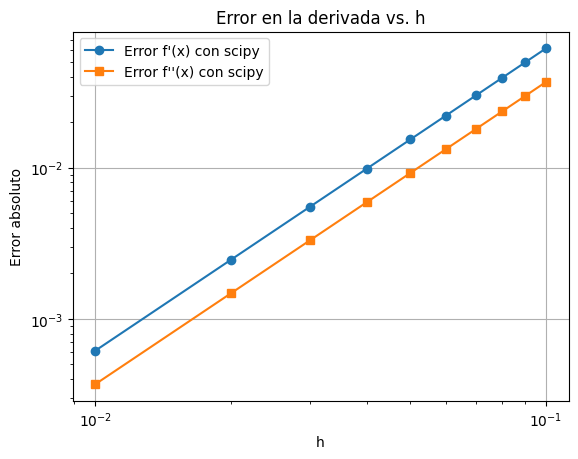

In [87]:
#Valor óptimo de h

plt.loglog(h_vals, error_primera, marker='o', label="Error f'(x) con scipy")
plt.loglog(h_vals, error_segunda, marker='s', label="Error f''(x) con scipy")
plt.xlabel("h")
plt.ylabel("Error absoluto")
plt.title("Error en la derivada vs. h")
plt.legend()
plt.grid(True)
plt.show()

Es claro que el valor de h óptimo es $h = 10^{-2}$, pues este es el que presenta el error más bajo.

#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [88]:
x_eval = 2
h = 0.01
f = lambda x: x*np.exp(x)
valor_real = derivative(f,x_eval, dx=h, n=1, order=5)

#Diferencias finitas:
df_finitas = primera_derivada(f,x_eval,h)
error_finitas = np.abs(df_finitas - valor_real)
print(f"Usando diferencias finitas, el valor de f'(2.0)={df_finitas:.6f} y su error es {error_finitas:.6f}")

#Derivada de tres:
def derivada_tres(f,x,h):
  return (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
df_tres = derivada_tres(f,x_eval,h)
error_tres = np.abs(df_tres - valor_real)
print(f"Usando derivada de tres, el valor de f'(2.0)={df_tres:.6f} y su error es {error_tres:.6f}")

#Derivada de cinco:
def derivada_cinco(f,x,h):
  return (-25*f(x) + 48*f(x+h) - 36*f(x+2*h) + 16*f(x+3*h) - 3*f(x+4*h))/(12*h)
df_cinco = derivada_cinco(f,x_eval,h)
error_cinco = np.abs(df_cinco - valor_real)
print(f"Usando derivada de cinco, el valor de f'(2.0)={df_cinco:.6f} y su error es {error_cinco:.6f}")

Usando diferencias finitas, el valor de f'(2.0)=22.167784 y su error es 0.000616
Usando derivada de tres, el valor de f'(2.0)=22.165926 y su error es 0.001243
Usando derivada de cinco, el valor de f'(2.0)=22.167168 y su error es 0.000000


<ipython-input-88-b49b1c9d5e87>:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  valor_real = derivative(f,x_eval, dx=h, n=1, order=5)
